# Evaluation

## Pre-requisites:

- Having a working environment


## Main task:

For this evaluation we expect you to provide us a jupyter notebook (firstname_name.ipynb) which includes:

- Your name & first name
- A title: "Data Exploration: Evaluation"
- A part "Load and Explore Dataset" which includes codes and markdown doing as the title suggest (N.B: this dataset is for a classification task, so the exploration should include  a quick analysis on class repartition)
- A part "Simple processing" which includes some basic pre-processing and comments: keep only numbers features, remove NaN values, separate inputs and targets data
- A part "Train and Evaluate SVM" which should include the training of a Support Vector Machine (SVM) model  and the evaluation of its performance (since its a classification task you might be interested to look for confusion matrix in addition to accuracy)

To summarize, you should approximately do as in the first part of the data exploration lab. With a bit more of exploration and analysis of the target.


Your grade will be based on:

- The usage of headers and clear markdown comment.
- The code readability.
- The usage of smart variables name.
- The usage of existing built-in methods and function from pandas, sklearn and numpy.
- The presence and pertinence of visualizations.
- Insightful comments and analysis towards your code (like: "There is four diffrent types of data: int, date, str. Therefore, we will make the choice to only keep numbers features because...")


**N.B**: This is a difficult dataset so do not worry (except if you want to spend more time on it) if you don't have over 30% of accuracy

## Contacts: 

- antonin.poche@irt-saintexupery.com 
- mouhcine.mendil@irt-saintexupery.com  
- lucas.hervier@irt-saintexupery.com

<h1  style = "font-size:40px;background-color: Black ; color : White; text-align: center; border-radius: 20px 20px;">Mise en place : téléchargement des libraries et importation du dataset</h1>

In [55]:
# Librairies basiques de python
from typing import Callable, Dict, List, Optional, Tuple, Union

# Importation des librairies de machine learning
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsOneClassifier
from sklearn.decomposition import PCA


In [56]:
# chemin du dataset 
path = "../evaluation/music_genre_dataset.csv"

# définition du dataset 
df = pd.read_csv(path)
df

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,Green-House,Find Home,35.0,0.166,0.109,7.0,-17.100,0,0.0413,0.993000,0.824000,0.0984,0.1770,171.587,193450.0,3,6
17992,Micatone,All Gone,27.0,0.638,0.223,11.0,-10.174,0,0.0329,0.858000,0.000016,0.0705,0.3350,73.016,257067.0,4,2
17993,Smash Hit Combo,Peine perdue,34.0,0.558,0.981,4.0,-4.683,0,0.0712,0.000030,0.000136,0.6660,0.2620,105.000,216222.0,4,8
17994,Beherit,Salomon's Gate,29.0,0.215,0.805,6.0,-12.757,0,0.1340,0.001290,0.916000,0.2560,0.3550,131.363,219693.0,4,8


In [57]:
print("Il y a", len(df), "données dans cet échantillon qui sont décrites avec", len(df.columns), "critères.")  

Il y a 17996 données dans cet échantillon qui sont décrites avec 17 critères.


In [58]:
df.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


Ce dataset répertoriant différentes musiques, est constitué de presque 18 000 échantillons différents, chacun décrits grâce à 17 critères.  
Nous pouvons voir que ces musiques sont décrites grâce au nom de l'artiste, son nom, son pourcentage d'énergie qui peut être ressenti, le potentiel de dansabilité ainsi que sa côte de popularité.  
Chacune de ces musiques appartienne à un genre musical, correspond à la variable *Class*.  
Le but de cet exercice est d'arriver à prédire le genre musical de chaque musique via le machine learning.

<h1  style = "font-size:40px;background-color: Black ; color : White; text-align: center; border-radius: 20px 20px;">Nettoyage du dataset</h1>

<h1  style = "font-size:20px; color : Green; text-align: left;">Nettoyage du dataset : Isolation de notre cible</h1>

In [59]:
# On isole la cible du dataset, et donc ce qu'on va chercher à prédire
target_name = "Class"

def extract_target(data: pd.DataFrame, target_name: str) -> (pd.DataFrame, pd.Series):
    """
    Extract the target and return th splited data.
    Should not modify data.
    'target_name' should be a column index of data.
    """
    df = data.copy()
    target = df.pop(target_name)  
    return df, target  

df, target = extract_target(df, target_name)

In [60]:
print(f'Il y a maintenant {df.shape[1]} colonnes dans ce dataset.')
print(f'Shape de la target : {target.shape}.')
print(target)

Il y a maintenant 16 colonnes dans ce dataset.
Shape de la target : (17996,).
0         5
1        10
2         6
3         5
4        10
         ..
17991     6
17992     2
17993     8
17994     8
17995    10
Name: Class, Length: 17996, dtype: int64


<h1  style = "font-size:20px; color : Green; text-align: left;">Nettoyage du dataset : Retrait des données NaN</h1>

Afin d'éviter toutes erreurs pouvant subvenir lors de la prédiction de nos classes, il faut s'assurer que le dataset ne possèdent pas de valeurs **NaN** qui pourraient faire échouer notre entraînement.

In [61]:
nan = df.isna().sum()  
for i in range(len(nan)):
    if nan[i] > 0:
        print(f'il y a {nan[i]} NaN dans la colonne {nan.index[i]}.')
print(f'il y a {(df.isna().T.sum() != 0).sum()} lignes dans lesquelles il y a au moins un Nan.')


il y a 428 NaN dans la colonne Popularity.
il y a 2014 NaN dans la colonne key.
il y a 4377 NaN dans la colonne instrumentalness.
il y a 6183 lignes dans lesquelles il y a au moins un Nan.


Comme vu ci-dessus, trois colonnes sont concernées par des données manquantes, ce qui équivaut également à 6183 échantillons. Nous allons enlever ces **NaN** en retirant les colonnes concernées du dataset.

In [62]:
def remove_nan(data: pd.DataFrame) -> pd.DataFrame:
    """
    Remove NaN values from a dataframe
    """
    new_data = data.dropna(axis = 1)  
    return new_data  


clean_data = remove_nan(df)

print(f'Shape du dataset nettoyé : {clean_data.shape}.')  

Shape du dataset nettoyé : (17996, 13).


Nous nous assurons que toutes les valeurs manquantes ont bien été supprimées.

In [63]:
nan_verified = clean_data.isna().sum()  
for i in range(len(nan_verified)):
    if nan_verified[i] > 0:
        print(f'il y a {nan_verified[i]} NaN dans la colonne {nan_verified.index[i]}.')
print(f'il y a {(clean_data.isna().T.sum() != 0).sum()} lignes dans lesquelles il y a au moins un Nan.')


il y a 0 lignes dans lesquelles il y a au moins un Nan.


<h1  style = "font-size:40px;background-color: Black ; color : White; text-align: center; border-radius: 20px 20px;">Analyse du dataset</h1>

<h1  style = "font-size:20px; color : Green; text-align: left;">Analyse du dataset : type de nos données</h1>

Nous allons maintenant analyser ce dataset afin de mieux le comprendre. Nous allons notamment regarder les types de données ainsi que les statistiques et les répartitions autour de ce dataset.

In [64]:
print(f'Les features de ce dataset ont chacun pour type : {clean_data.dtypes}')  
print(clean_data.dtypes.value_counts())

Les features de ce dataset ont chacun pour type : Artist Name            object
Track Name             object
danceability          float64
energy                float64
loudness              float64
mode                    int64
speechiness           float64
acousticness          float64
liveness              float64
valence               float64
tempo                 float64
duration_in min/ms    float64
time_signature          int64
dtype: object
float64    9
object     2
int64      2
dtype: int64


Afin d'avoir une meilleure idée de notre dataset, nous affichons le nombre de valeurs uniques pour chaque features.

In [65]:
features_nunique = clean_data.nunique()  
print(features_nunique)

features_types = clean_data.dtypes

features_types_nunique = pd.DataFrame({"types": features_types, "nunique": features_nunique})
print(features_types_nunique)

Artist Name            9149
Track Name            15129
danceability            909
energy                 1208
loudness               9002
mode                      2
speechiness            1194
acousticness           3930
liveness               1459
valence                1320
tempo                 13562
duration_in min/ms    14121
time_signature            4
dtype: int64
                      types  nunique
Artist Name          object     9149
Track Name           object    15129
danceability        float64      909
energy              float64     1208
loudness            float64     9002
mode                  int64        2
speechiness         float64     1194
acousticness        float64     3930
liveness            float64     1459
valence             float64     1320
tempo               float64    13562
duration_in min/ms  float64    14121
time_signature        int64        4


<AxesSubplot: title={'center': 'répartition des valeurs pour chaque features selon leur type'}, xlabel='features', ylabel='nombre des différentes valeurs \n(échelle logarithmique)'>

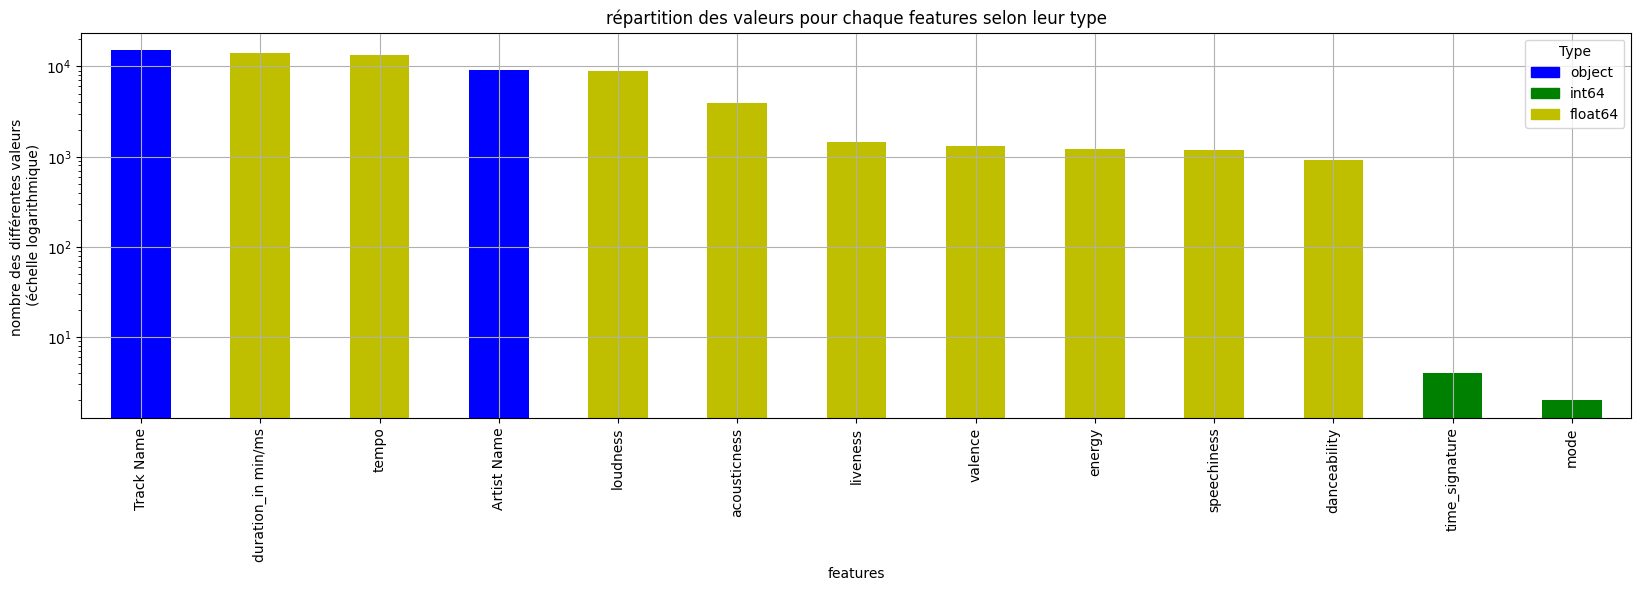

In [66]:
sorted_features = features_types_nunique.sort_values(by=["nunique"], ascending=False)

# Define labels and colors for legend
labels, labels_colors = ["object", "int64", "float64"], ["b", "g", "y"]
colors = sorted_features["types"].replace(labels, labels_colors)

# Manage legend
handles = [plt.Rectangle((0,0),1,1, color=color) for color in labels_colors]
plt.legend(handles, labels, title="Type")

# Make bar plot
sorted_features["nunique"].plot(kind="bar", color=list(colors), logy=True, figsize=(20, 5), grid=True,
                                xlabel="features", ylabel="nombre des différentes valeurs \n(échelle logarithmique)", 
                                title="répartition des valeurs pour chaque features selon leur type")



A l'aide du graphique ci-dessus, nous pouvons voir que pour les données de type *object* et *float64*, les valeurs sont diversifiées, au contraire des données de type *int64*.

<h1  style = "font-size:20px; color : Green; text-align: left;">Analyse du dataset : Un peu de data visualisation</h1>

Afin d'avoir une meilleure idée de la répartition de nos données, nous allons passer par une étape de datavisualisation et d'étude de statistiques.  
Ci-dessous, nous affichons les statistiques associées à nos données une fois nettoyées.

In [67]:
clean_data.describe()

,danceability,energy,loudness,mode,speechiness,acousticness,liveness,valence,tempo,duration_in min/ms,time_signature
count,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,1.799600e+04,17996.000000
mean,0.543433,0.662777,-7.910660,0.636753,0.079707,0.247082,0.196170,0.486208,122.623294,2.007445e+05,3.924039
std,0.166268,0.235373,4.049151,0.480949,0.083576,0.310632,0.159212,0.240195,29.571527,1.119891e+05,0.361618
min,0.059600,0.000020,-39.952000,0.000000,0.022500,0.000000,0.011900,0.018300,30.557000,5.016500e-01,1.000000
25%,0.432000,0.509000,-9.538000,0.000000,0.034800,0.004300,0.097500,0.297000,99.620750,1.663370e+05,4.000000
50%,0.545000,0.700000,-7.016000,1.000000,0.047400,0.081400,0.129000,0.481000,120.065500,2.091600e+05,4.000000
75%,0.659000,0.860000,-5.189000,1.000000,0.083000,0.434000,0.258000,0.672000,141.969250,2.524900e+05,4.000000
max,0.989000,1.000000,1.355000,1.000000,0.955000,0.996000,1.000000,0.986000,217.416000,1.477187e+06,5.000000


Nous les affichons également sous la forme de boxplot afin d'avoir un compte-rendu plus visuel.

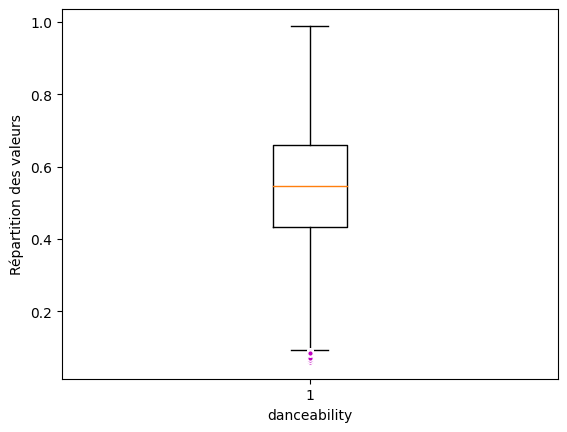

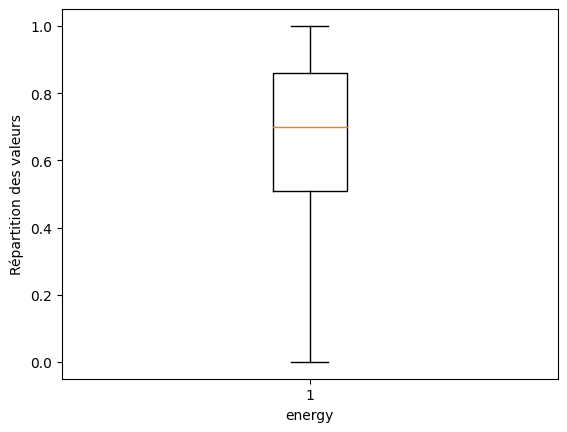

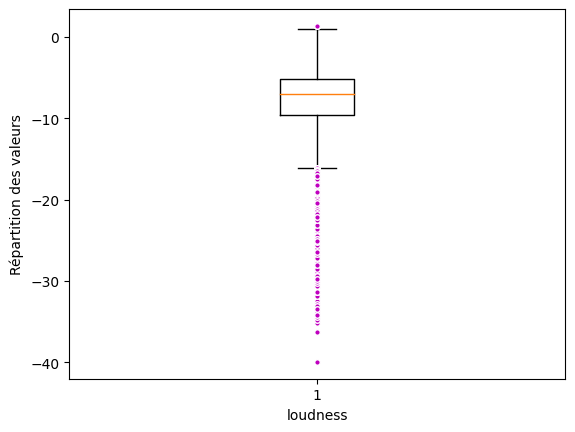

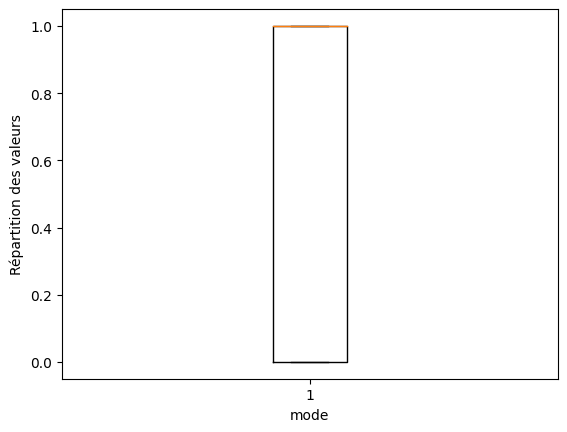

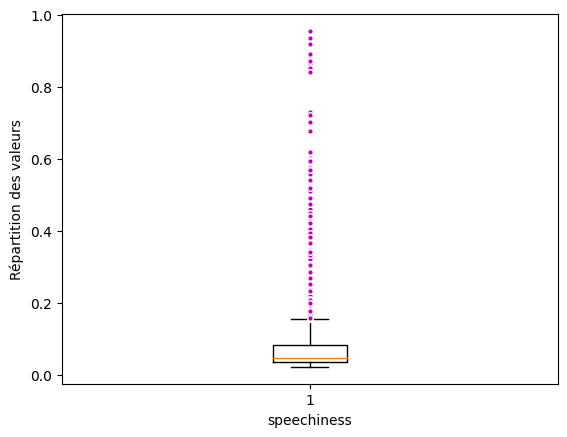

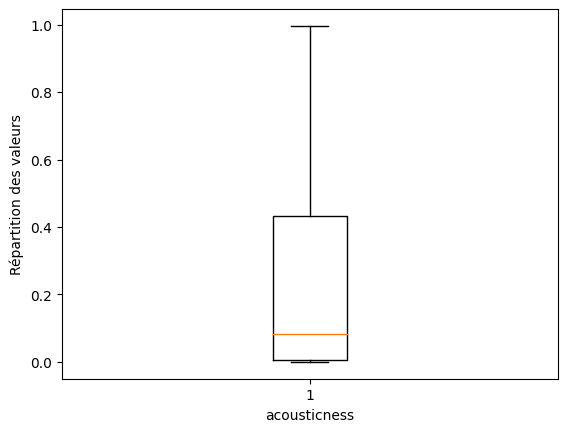

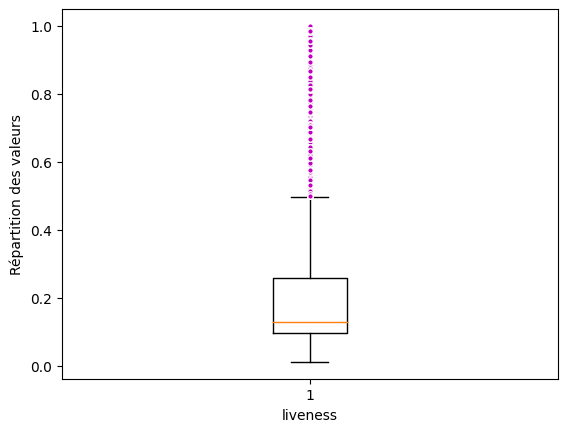

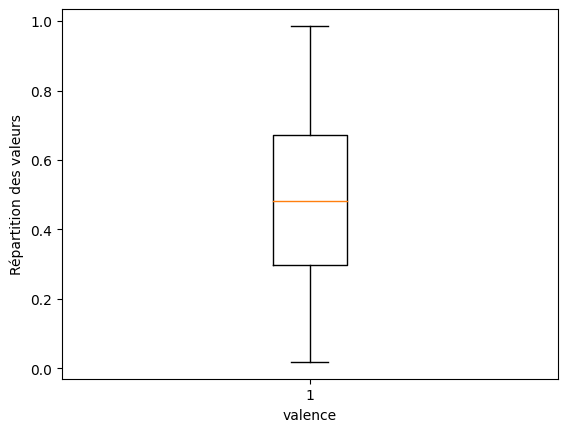

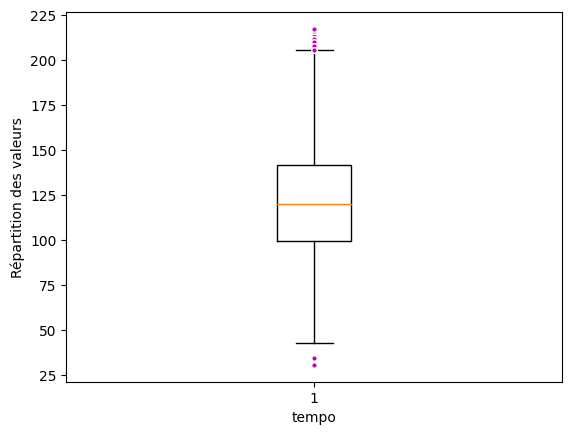

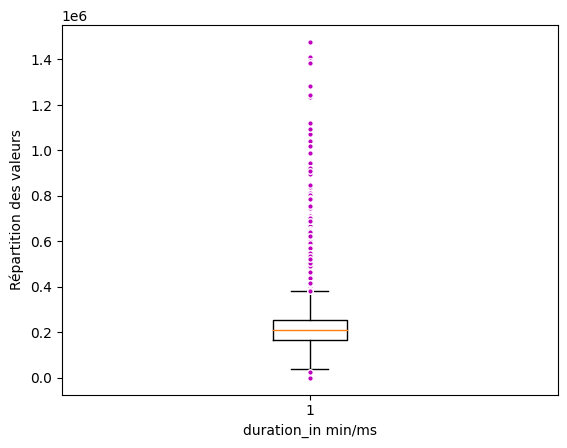

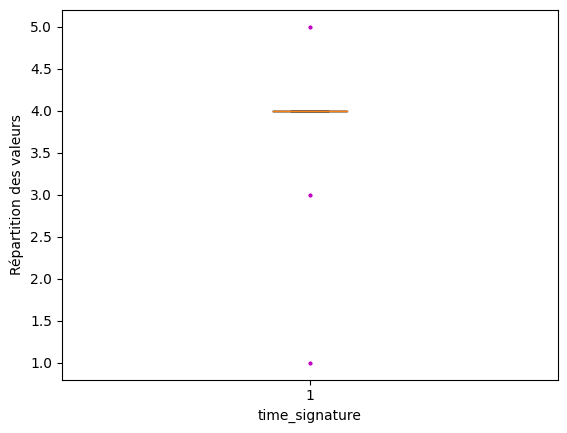

In [68]:
for nom_col in clean_data.columns:
    if  clean_data[nom_col].dtypes != 'O':
        red_square = dict(markerfacecolor='m', marker='o', markersize=4, markeredgecolor='w')
        plt.boxplot(clean_data[nom_col], flierprops=red_square)
        plt.xlabel(nom_col)
        plt.ylabel("Répartition des valeurs")
        plt.show()

Nous pouvons noter par exemple que pour le feature **valence**, la répartition des données est plutôt correcte lorsqu'on observe les quartiles, médiane et moyenne. En revanche, nous pouvons par exemple noter que la répartition des données pour le feature **acousticness** est assez inégale. En effet, nous pouvons affirmer à titre d'exemple que la moyenne est très proche du premier quartile, tout en aillant sa valeur maximale élevée.

Nous affichons maintenant la répartition des classes de notre dataset.

In [69]:
from plotly import graph_objs as go

labels = target.groupby(target).size().index
values = target.groupby(target).size().values
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.6,title='Distribution of labels in the dataset')])
fig.show()

Nous pouvons voir que la répartition des genres est très inégale. En effet, pour le genre portant le label 10, il concerne le quart du dataset. En revanche, les genres identifiés avec les labels 4, 3, 7 et 0 sont en quantité très faible (moins de 5% du dataset pour chacun d'entre eux).

<h1  style = "font-size:40px;background-color: Black ; color : White; text-align: center; border-radius: 20px 20px;"> Classification</h1>

<h1  style = "font-size:20px; color : Green; text-align: left;">Classification : Séparation des données </h1>

Afin que notre classifieur marche, il ne faut avoir que des données de type *int* ou *float*. Or, Ce dataset contient des données de type *object*. Il faut alors séparer le dataset afin de ne conserver que les données nécessaires.

In [70]:
def divide_numbers_strings(data: pd.DataFrame) -> (pd.DataFrame, pd.DataFrame):
    """
    Divide data between features' computer types
    """

    numbers_data = data.select_dtypes(['number'])
    strings_data = data.select_dtypes(['object'])
    return numbers_data, strings_data 


numbers_data, string_data = divide_numbers_strings(clean_data)

print(numbers_data.info(verbose = False))
print(string_data.info(verbose = False))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Columns: 11 entries, danceability to time_signature
dtypes: float64(9), int64(2)
memory usage: 1.5 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Columns: 2 entries, Artist Name to Track Name
dtypes: object(2)
memory usage: 281.3+ KB
None


In [71]:
# Affichage des données conservées
numbers_data

,danceability,energy,loudness,mode,speechiness,acousticness,liveness,valence,tempo,duration_in min/ms,time_signature
0,0.854,0.564,-4.964,1,0.0485,0.017100,0.0849,0.8990,134.071,234596.0,4
1,0.382,0.814,-7.230,1,0.0406,0.001100,0.1010,0.5690,116.454,251733.0,4
2,0.434,0.614,-8.334,1,0.0525,0.486000,0.3940,0.7870,147.681,109667.0,4
3,0.853,0.597,-6.528,0,0.0555,0.021200,0.1220,0.5690,107.033,173968.0,4
4,0.167,0.975,-4.279,1,0.2160,0.000169,0.1720,0.0918,199.060,229960.0,4
...,...,...,...,...,...,...,...,...,...,...,...
17991,0.166,0.109,-17.100,0,0.0413,0.993000,0.0984,0.1770,171.587,193450.0,3
17992,0.638,0.223,-10.174,0,0.0329,0.858000,0.0705,0.3350,73.016,257067.0,4
17993,0.558,0.981,-4.683,0,0.0712,0.000030,0.6660,0.2620,105.000,216222.0,4
17994,0.215,0.805,-12.757,0,0.1340,0.001290,0.2560,0.3550,131.363,219693.0,4


<h1  style = "font-size:20px; color : Green; text-align: left;">Classification : Entraînement et test de notre classifieur</h1>

Afin d'avoir un suivi de notre classifieur nous créerons deux listes : 
* **condition**: Amélioration/Modification effectuées sur les données;
* **accuracy**: Suivi des accuracy obtenues au fur et à mesure de notre phase d'entraînement.

In [72]:
condition = []
accuracy = []

Nous allons découper notre dataset en deux sous-dataset. Il y aura le dataset d'entraînement et le dataset de test. Ils seront découpés avec une proportion 80/20.

In [73]:
# Découpage de notre dataset en échantillon d'entraînement et de test
train, test, y_train, y_test = train_test_split(numbers_data, target, test_size = 0.20, random_state =500)

Nous allons utiliser un modèle de Support Vector Machine. Pour résumer, un *SVM* est un modèle d'apprentissage supervisé qui est utilisé pour une classification multi-classes. Pour illustrer, le modèle sépare les différentes classes dans un plan via une frontière.

In [74]:
# Définition du modèle
model = SVC()

#Entraînement du model
model_fit = model.fit(train, y_train)

#Prédiction de nos classes
y_pred = model_fit.predict(test)

In [75]:
# Affichage de l'accuracy
acc = accuracy_score(y_test, y_pred)
print(acc)

0.3025


In [76]:
#Ajout de l'accuracy trouvée et de la condition d'utilisation du classifieur
accuracy.append(acc)
condition.append('SVM classique avec NaN retirés par les colonnes')

Nous avons ainsi effectué la construction de notre modèle. Voyons maintenant si on peut l'améliorer via différentes techniques.

<h1  style = "font-size:20px; color : Green; text-align: left;">Classification : Conversion des NaN en 0</h1>

Afin d'optimiser notre modèle, nous allons remplacer les *NaN* par la valeur 0 et ainsi voir si cela apporte une amélioration sur la valeur de notre accuracy. 

In [77]:
# Fonction qui remplace les valeurs NaN par des 0
def Nan(df):
    data = df.copy()
    data.fillna(0, inplace = True)
    
    return data

data_nan_0 = Nan(df)    

In [78]:
# Vérification de la présence des NaN
data_nan_0.isna().sum()

Artist Name           0
Track Name            0
Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
dtype: int64

In [79]:
# Séparation des données avec un datasat des int/float et des données de type object
data_nan_0_numbers, data_nan_0_string = divide_numbers_strings(data_nan_0)

In [80]:
# Création des dataset associés au changement des NaN
train0, test0, y_train0, y_test0 = train_test_split(data_nan_0_numbers, target, test_size = 0.20, random_state =500)

In [81]:
#Entraînement et prédiction du modèle
model = SVC()
model_fit = model.fit(train0, y_train0)
y_pred = model_fit.predict(test0)
acc = accuracy_score(y_test0, y_pred)
print(acc)

0.3025


In [82]:
accuracy.append(acc)
condition.append('NaN convertis en 0')

<h1  style = "font-size:20px; color : Green; text-align: left;">Classification : Conversion des NaN par la moyenne des colonnes</h1>

Afin d'optimiser notre modèle, nous allons remplacer les *NaN* par la valeur 0 et ainsi voir si cela apporte une amélioration sur la valeur de notre accuracy. 

In [83]:
# Fonction qui remplace les valeurs NaN par la moyenne
def mean(df):
    data = df.copy()
    data.fillna(df.mean(), inplace = True)
    
    return data

data_mean = mean(df) 

C:\Users\33666\AppData\Local\Temp\ipykernel_68880\3322136990.py:4: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



In [84]:
# Séparation des données avec un datasat des int/float et des données de type object
data_mean_numbers, data_mean_string = divide_numbers_strings(data_mean)

In [85]:
# Création des dataset associés au changement des NaN
train_mean, test_mean, y_train_mean, y_test_mean = train_test_split(data_mean_numbers, target, test_size = 0.20, random_state =500)

In [86]:
# Entraînement du modèle et prédiction
model = SVC()
model_fit = model.fit(train_mean, y_train_mean)
y_pred = model_fit.predict(test_mean)
acc = accuracy_score(y_test_mean, y_pred)
print(acc)

0.3025


In [87]:
accuracy.append(acc)
condition.append('nan remplacés par la moyenne des colonnes')

In [88]:
print(accuracy, condition)

[0.3025, 0.3025, 0.3025] ['SVM classique avec NaN retirés par les colonnes', 'NaN convertis en 0', 'nan remplacés par la moyenne des colonnes']


Il semblerait que remplacer les NaN par la moyenne des colonnes concernées ou par 0 n'a pas d'incidence sur notre accuracy. Nous allons alors utiliser d'autres techniques afin d'améliorer celle-ci.

<h1  style = "font-size:20px; color : Green; text-align: left;">Classification : Utilisation de la méthode OneVsRest</h1>

La méthode **OneVsRest** est utilisée dans des problèmes de classification multi-classes. Cette méthode découpe le dataset en un problème de classification binaire. Chaque classe sera évaluée en comparaison avec toutes les autres classes en même temps.  
Un classifieur binaire est ensuite entraîné sur chaque problème de classification binaire et les prédictions sont faites en utilisant le modèle le plus fiable.

In [89]:
#Nous redéfinissons nos sous-datasets avec les colonnes comportant des NaN retirées
train, test, y_train, y_test = train_test_split(numbers_data, target, test_size = 0.20, random_state =500)

In [90]:
#Entraînement et prédictions de notre modèle 
model = OneVsRestClassifier(SVC())
model_fit = model.fit(train, y_train)
y_pred = model_fit.predict(test)
acc = accuracy_score(y_test, y_pred)
print(acc)

0.10111111111111111


La méthode OneVsRest n'a pas été performante comme nous pouvons le constater avec le score obtenu ci-dessus. 

In [91]:
accuracy.append(acc)
condition.append('OneVsRestClassifier')

<h1  style = "font-size:20px; color : Green; text-align: left;">Classification : Utilisation de la méthode OneVsOne</h1>

Nous utilisons maintenant la méthode **OneVsOne**. Elle est également utilisée dans des problèmes de classification multi-classes. Cette méthode découpe le dataset en un problème de classification binaire. En revanche, chaque classe sera évaluée en comparaison avec toutes les autres classes une par une.  
Un classifieur binaire est ensuite entraîné sur chaque problème de classification binaire et les prédictions sont faites en fonction de la classe la plus présente.

In [92]:
#Entraînement et prédictions du modèle
model = OneVsOneClassifier(SVC())
model_fit = model.fit(train, y_train)
y_pred = model_fit.predict(test)
acc = accuracy_score(y_test, y_pred)
print(acc)

0.32305555555555554


L'accuracy est légèrement meilleure. Nous allons alors conserver cette méthode pour la suite.

In [93]:
accuracy.append(acc)
condition.append('OneVsOneClassifier')

<h1  style = "font-size:20px; color : Green; text-align: left;">Classification : Utilisation de la méthode gridSearch</h1>

Une autre technique intéressante à utiliser est la méthode GridSearch. Cependant l'utilisation de cette méthode était longue. Nous avons alors programmé une méthode de gridSearch manuelle.  
Cette méthode sert à trouver les meilleurs paramètres permettant d'optimiser au maximum le score de notre modèle.

In [94]:
from sklearn.model_selection import GridSearchCV

In [95]:
# grid = {'kernel' : ['linear', 'poly', 'rbf'],
#        'degree' : [1, 2, 3, 4, 5],
#        'tol' : [1e-1, 1e-2, 1e-3, 1e-4, 1e-5],
#        'cache_size' : [100, 200, 500]
#        }

In [96]:
kernel = ['linear', 'poly', 'rbf']
degree = [1, 2, 3, 4, 5]
tol = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
cache_size = [100, 200, 500]

In [97]:
# best_accuracy = 0
# compteur = 0
# for i in range(len(kernel)):
#     for j in range(len(degree)):
#         for k in range(len(tol)):
#             for l in range(len(cache_size)):
#                 model = OneVsOneClassifier(SVC(kernel = kernel[i], degree = degree[j], tol = tol[k], cache_size = cache_size[l]))
#                 model_fit = model.fit(train, y_train)
#                 y_pred = model_fit.predict(test)  
#                 accuracy = accuracy_score(y_test, y_pred)
                
#                 compteur = compteur + 1
#                 print(compteur)
#                 if best_accuracy < accuracy:
#                     best_accuracy = accuracy
                    
#                     k, d, t, c = kernel[i], degree[j], tol[k], cache_size[l]
#                     print('Les paramètres les plus performants sont : kernel ', k, ', degree =', d, ', tol =', t, ', cache_size =', c)
                
#                     print('La meilleure accuracy obtenue est : ', best_accuracy)
                    
                    
# print('Les paramètres les plus performants sont : kernel ', k, ', degree =', d, ', tol =', t, ', cache_size =', c)               
# print('La meilleure accuracy obtenue est : ', best_accuracy)

In [98]:
# #model = GridSearchCV(OneVsOneClassifier(SVC()), grid)
# model = OneVsOneClassifier(SVC(kernel = k, degree = d, tol = t, cache_size = c))
# model_fit = model.fit(train, y_train)
# y_pred = model_fit.predict(test)
# acc = accuracy_score(y_test, y_pred)
# print(acc)

# accuracy.append(acc)
# condition.append('gridSearch manuel')

In [99]:
# model = GridSearchCV(OneVsOneClassifier(SVC()), grid)
# model_fit = model.fit(train, y_train)
# y_pred = model_fit.predict(test)
# acc = accuracy_score(y_test, y_pred)
# print(acc)
# print(model_fit.best_params_)

# accuracy.append(acc)
# condition.append('GridSearch classique')

Cette méthode a également était trop longue. la cellule a tourné pendant une dizaine d'heure sans pour autant renvoyer un résultat.

<h1  style = "font-size:20px; color : Green; text-align: left;">Classification : Prédiction avec les données normalisées</h1>

Nous allons normaliser les données afin de voir si cela a un effet sur nos prédictions. Nous utiliserons la normalisation via l'usage du minimum et du maximum de chaque colonne.

In [100]:
def min_max_scaling(data: pd.DataFrame, data_min: pd.Series = None, data_max: pd.Series = None) -> pd.DataFrame:
    """
    Normalize a DataFrame using a min-max scaling.
    """
    if data_min is None:
        mini = data.min(axis=0)
    if data_max is None:
        maxi = data.max(axis=0) 
    
    numerateur = data - mini
    denominateur = maxi - mini
    normalisation = numerateur/denominateur

    return normalisation  


# Normalize
scaled_numerical_data = min_max_scaling(numbers_data)  

# Verify
scaled_numerical_data.describe()

,danceability,energy,loudness,mode,speechiness,acousticness,liveness,valence,tempo,duration_in min/ms,time_signature
count,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000,17996.000000
mean,0.520587,0.662770,0.775688,0.636753,0.061348,0.248074,0.186489,0.483526,0.492705,0.135896,0.731010
std,0.178899,0.235378,0.098026,0.480949,0.089626,0.311880,0.161129,0.248213,0.158256,0.075812,0.090404
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400689,0.508990,0.736292,0.000000,0.013190,0.004317,0.086631,0.288002,0.369604,0.112604,0.750000
50%,0.522272,0.699994,0.797347,1.000000,0.026702,0.081727,0.118510,0.478144,0.479016,0.141593,0.750000
75%,0.644932,0.859997,0.841576,1.000000,0.064879,0.435743,0.249064,0.675519,0.596237,0.170926,0.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [101]:
from sklearn.multiclass import OneVsOneClassifier

train, test, y_train, y_test = train_test_split(scaled_numerical_data, target, test_size = 0.20, random_state = 500)

model = OneVsOneClassifier(SVC())
model_fit = model.fit(train, y_train)
y_pred = model_fit.predict(test)
acc = accuracy_score(y_test, y_pred)
print(acc)

0.48444444444444446


In [102]:
accuracy.append(acc)
condition.append('Normalized data')

Le pourcentage de réussite de nos prédictions a grandement évolué. Il est à ce jour le meilleur avec une valeur d'environ **0.484**. 

<h1  style = "font-size:20px; color : Green; text-align: left;">Classification : Prédiction avec les données standardisées</h1>

Nous regardons aussi l'évolution de l'accuracy avec des données normalisées de façon standard.

In [103]:
def standardization(data: pd.DataFrame, data_mean: pd.Series = None, data_std: pd.Series = None) -> pd.DataFrame:
    """
    Normalize a DataFrame using a standard normalization.
    """
    
    if data_mean is None:
        mean = data.mean(axis = 0) 
    if data_std is None:
        std = data.std(axis = 0)
    
    return (data - mean)/std  


# Standardize
standardized_numerical_data = standardization(numbers_data)  

# Verify
standardized_numerical_data.describe()

,danceability,energy,loudness,mode,speechiness,acousticness,liveness,valence,tempo,duration_in min/ms,time_signature
count,1.799600e+04,1.799600e+04,1.799600e+04,1.799600e+04,1.799600e+04,1.799600e+04,1.799600e+04,1.799600e+04,1.799600e+04,1.799600e+04,1.799600e+04
mean,-4.935421e-16,1.883357e-16,2.037342e-16,-5.725089e-17,-8.844275e-17,-4.422137e-17,7.896674e-17,-1.437195e-16,-1.054206e-16,-3.652212e-17,6.968815e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.909952e+00,-2.815766e+00,-7.913101e+00,-1.323951e+00,-6.844902e-01,-7.954154e-01,-1.157389e+00,-1.948034e+00,-3.113343e+00,-1.792531e+00,-8.085991e+00
25%,-6.702005e-01,-6.533311e-01,-4.018967e-01,-1.323951e+00,-5.373189e-01,-7.815727e-01,-6.197404e-01,-7.877278e-01,-7.778612e-01,-3.072393e-01,2.100597e-01
50%,9.423202e-03,1.581456e-01,2.209500e-01,7.552728e-01,-3.865580e-01,-5.333692e-01,-4.218906e-01,-2.168440e-02,-8.649516e-02,7.514606e-02,2.100597e-01
75%,6.950613e-01,8.379166e-01,6.721557e-01,7.552728e-01,3.940128e-02,6.017351e-01,3.883515e-01,7.735020e-01,6.542089e-01,4.620586e-01,2.100597e-01
max,2.679803e+00,1.432716e+00,2.288297e+00,7.552728e-01,1.047301e+01,2.410949e+00,5.048814e+00,2.080772e+00,3.205540e+00,1.139791e+01,2.975410e+00


Nous effectuons à nouveau l'entraînement du modèle.

In [104]:
train, test, y_train, y_test = train_test_split(standardized_numerical_data, target, test_size = 0.20, random_state =500)

model = OneVsOneClassifier(SVC())
model_fit = model.fit(train, y_train)
y_pred = model_fit.predict(test)
acc = accuracy_score(y_test, y_pred)
print(acc)

0.49777777777777776


In [105]:
accuracy.append(acc)
condition.append('Standardized data')

L'accuracy a à nouveau augmenté (bien que légèrement) avec cette méthode. Elle avoisine presque les **50%** de réussite.  
La normalisation standard ayant bien marché, nous utiliserons dans la suite les datasets associés à cette normalisation.

<h1  style = "font-size:20px; color : Green; text-align: left;">Classification : Utilisation de la méthode PCA</h1>

Enfin, la dernière méthode que l'on peut utiliser pour essayer d'optimiser nos résultats et la méthode **PCA : Principal Component Analysis**.  
La méthode PCAest une technique d'apprentissage non supervisé permettant de réduire la dimensionnalité des données. Elle augmente l'interprétabilité tout en minimisant la perte d'information. Elle permet aussi de trouver les caractéristiques les plus significatives du set de données. 

In [106]:
from sklearn.decomposition import PCA

#Réduction de dimensionalité
pca = PCA(.95)

#Application PCA
model_fit = pca.fit(train)

In [107]:
#Définition des nouveaux sous datasets 
train_nv = pca.transform(train)
test_nv = pca.transform(test)

In [108]:
model = OneVsOneClassifier(SVC())
model_fit = model.fit(train_nv, y_train)
y_pred = model_fit.predict(test_nv)
acc = accuracy_score(y_test, y_pred)
print(acc)

0.48305555555555557


In [109]:
accuracy.append(acc)
condition.append('Using of PCA')

Pour le coup, l'accuracy avec l'usage de PCA est à peine plus basse. La meilleure façon d'optimiser notre modèle reste pour l'instant l'utilisation de données avec une normalisation standard et l'usage de la méthode *OneVsOne*.

<h1  style = "font-size:20px; color : Green; text-align: left;">Classification : Utilisation d'un autre modèle</h1>

Par curiosité et afin de voir si les prédictions pouvaient encore être améliorées, nous avons utilisé des modèles différents pour observer les résultats.

In [118]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model_fit = model.fit(train, y_train)
y_pred = model_fit.predict(test)
acc = accuracy_score(y_test, y_pred)
print(acc)

0.5027777777777778


In [119]:
accuracy.append(acc)
condition.append('GradientBoostingClassifier')

In [120]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model_fit = model.fit(train, y_train)
y_pred = model_fit.predict(test)
acc = accuracy_score(y_test, y_pred)
print(acc)

0.3386111111111111


In [121]:
accuracy.append(acc)
condition.append('DecisionTreeClassifier')

In [122]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model_fit = model.fit(train, y_train)
y_pred = model_fit.predict(test)
acc = accuracy_score(y_test, y_pred)
print(acc)

0.4633333333333333


In [123]:
accuracy.append(acc)
condition.append('RandomForestClassifier')

<h1  style = "font-size:40px;background-color: Black ; color : White; text-align: center; border-radius: 20px 20px;"> Interprétation des résultats</h1>

Après une phase d'entraînement assez longue, nous pouvons affirmer que les meilleures prédictions obtenues (mais pas non plus excellentes) proviennent du modèle **GradientBoostingClassifier** et utilisant les données qui suivent une **normalisation standard**.

In [124]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model_fit = model.fit(train, y_train)
y_pred = model_fit.predict(test)
acc = accuracy_score(y_test, y_pred)

<h1  style = "font-size:20px; color : Green; text-align: left;">Interprétation des résultats : Courbe comparative</h1>

Nous affichons sous la forme d'une courbe les différentes accuracy obtenues.

Text(0, 0.5, 'méthodes utilisées')

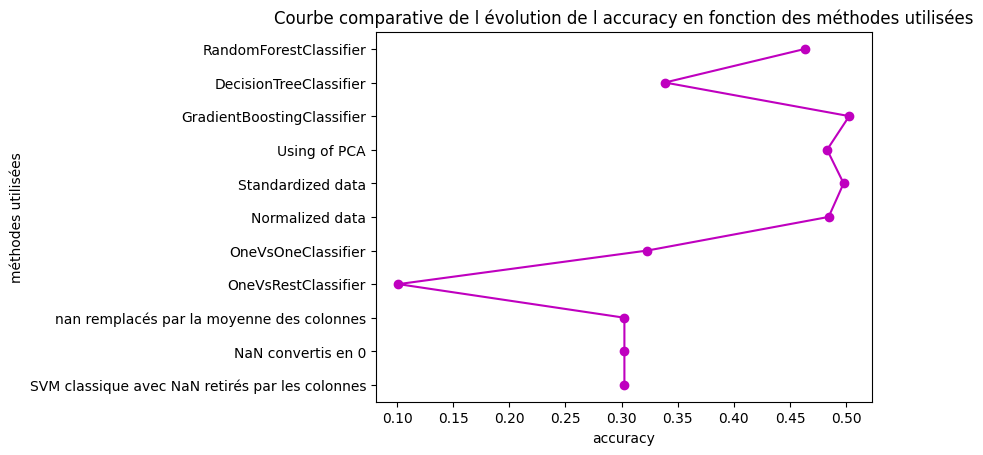

In [135]:
from matplotlib import pyplot as plt
plt.plot(accuracy, condition, 'mo', linestyle = '-')
plt.title('Courbe comparative de l évolution de l accuracy en fonction des méthodes utilisées')
plt.xlabel('accuracy')
plt.ylabel('méthodes utilisées')

Par souci de chevauchement des étiquettes des méthodes, nous affichons notre graphique ainsi, bien que ce ne soit pas standard.  
Nous pouvons ainsi voir l'évolution de notre accuracy.

Enfin, nous allons afficher la matrice de corrélation et la matrice de confusion de ce dataset.

<h1  style = "font-size:20px; color : Green; text-align: left;">Interprétation des résultats : Matrice de corrélation</h1>

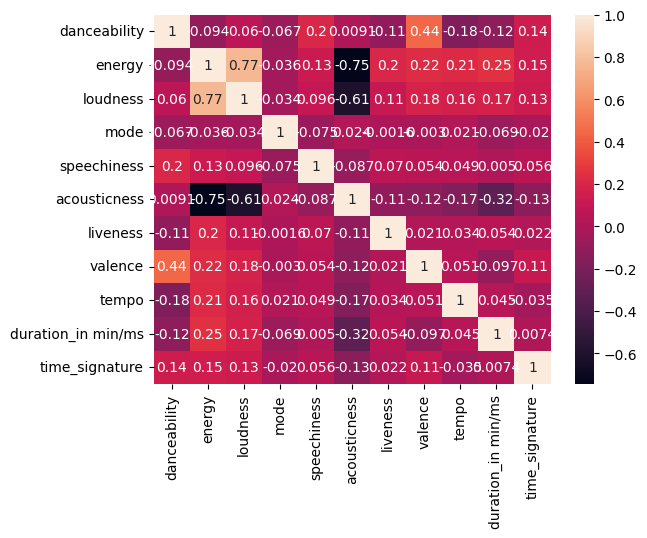

In [137]:
import seaborn as sn

#Création de la matrice de corrélation
corr_matrix = standardized_numerical_data.corr()
sn.heatmap(corr_matrix, annot=True)
plt.show()


Comme nous pouvons le constater ci-dessus, les features *loudness* et *energy* sont corrélées. Cela est plutôt cohérent car une une musique pouvant être qualifiée "d'énergique" a souvent une intensité sonore élevée.  
Les features *acousticness* et *energy* ainsi que *acousticness* et *loudness* sont faiblement corrélées. En effet, une musique utilisant une composition musicale accoutique est en règle générale, identifiée comme une musique douce ou une balade. Cela veut forcément dire que l'énergie et l'intensité sonore de la chanson sera plus faible.

<h1  style = "font-size:20px; color : Green; text-align: left;">Interprétation des résultats : Matrice de confusion</h1>

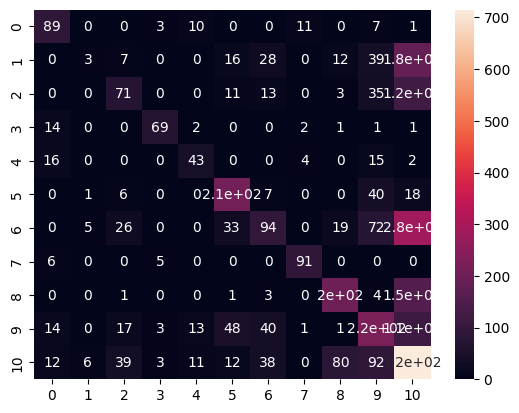

In [139]:
from sklearn.metrics import confusion_matrix

#Définition de la matrice de confusion
cm = confusion_matrix(y_test, y_pred)
sn.heatmap(cm, annot=True)
plt.show()

In [155]:
#Définition des faux positifs
FP = cm.sum(axis=0) - np.diag(cm) 

#Définition des faux négatifs
FN = cm.sum(axis=1) - np.diag(cm)

#Définition des vrais positifs
TP = np.diag(cm)

#Définition des vrais négatifs
TN = cm.sum() - (FP + FN + TP)

for i in range(len(FP)):
    print(f'Pour la classe {i}: \n faux positifs = {FP[i]}, faux négatifs = {FN[i]}, vrais positifs = {TP[i]} et vrais négatifs = {TN[i]}.')
    print(f'Le pourcentage de fausses prédictions pour chaque classe vaut {100 * (FP[i] + FN[i]) /(FP[i] + FN[i] +TP[i] + TN[i])} %.')

Pour la classe 0: 
 faux positifs = 62, faux négatifs = 32, vrais positifs = 89 et vrais négatifs = 3417.
Le pourcentage de fausses prédictions pour chaque classe vaut 2.611111111111111 %.
Pour la classe 1: 
 faux positifs = 12, faux négatifs = 287, vrais positifs = 3 et vrais négatifs = 3298.
Le pourcentage de fausses prédictions pour chaque classe vaut 8.305555555555555 %.
Pour la classe 2: 
 faux positifs = 96, faux négatifs = 184, vrais positifs = 71 et vrais négatifs = 3249.
Le pourcentage de fausses prédictions pour chaque classe vaut 7.777777777777778 %.
Pour la classe 3: 
 faux positifs = 14, faux négatifs = 21, vrais positifs = 69 et vrais négatifs = 3496.
Le pourcentage de fausses prédictions pour chaque classe vaut 0.9722222222222222 %.
Pour la classe 4: 
 faux positifs = 36, faux négatifs = 37, vrais positifs = 43 et vrais négatifs = 3484.
Le pourcentage de fausses prédictions pour chaque classe vaut 2.0277777777777777 %.
Pour la classe 5: 
 faux positifs = 121, faux négati

On constate que les classes ayant un taux de prédiction faux le plus élevé sont les classes 6, 9 et 10. Ce sont également les trois classes les plus représentées dans le dataset comme nous avons pu le voir précédemment.  
En revanche, les classes 0, 3 et 7 ont un très faible taux de prédictions fausses.